# Project Proposal: Group 59
### Jin Kim, Emily Ishii, Natasha Larin, Syed Haque

### Introduction

The Heart Disease dataset we will be analysing contains 14 attributes of 303 patients. We will be using the data found in the “processed.cleveland.data” file in the Heart Disease dataset directory. The attributes comprise parts of each patient’s health report, as well as their diagnosis of heart disease. Using this data, we will be answering which factors within the health report are the most influential in predicting the detection of heart disease in patients. 

* Age of patient (age) - years
* Sex of the patient (sex)
    * 1 = Male
    * 2 = Female
* Chest pain type (cp)
    * 1 = Typical Angina
    * 2 = Atypical Angina
    * 3 = Non-aginal Pain
    * 4 = Asymptomatic
* Blood pressure (trestbps) - mm Hg
* Serum cholesterol (chol) - mg/dl
* Fasting blood sugar > 120 mg/dl (fbs) - true or false
* Resting ECG results (restecg)
    * 0 = Normal
    * 1 = Abnormal
    * 2 = Probable or definite left ventricular hypertrophy
* Maximum heart rate achieved (thalach) - bpm
* Exercise induced agina (exang)
    * 0 = No
    * 1 = Yes
* Depression induced by exercise related to rest (oldpeak)
* Slope of the peake exercise segment (slope)
* Number of major vessels (ca)
* Condition (thal)
    * 3 = Normal
    * 6 = fixed defect
    * 7 = reversable defect
* Diagnosis of heart disease (num)
    * num = severity or existence of heart disease
    
Our question: **Which factors within the health report are the most influential in predicting the detection of heart disease in patients?**

### Preliminary Exploratory Data Analysis

In [19]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

**Reading in, tidying, and splitting the dataset**

In [41]:
names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
patient_data <- read_csv("data/processed.cleveland.data", col_names = names) |>
    mutate(num = as_factor(num)) |>
    mutate(cp = as_factor(cp)) |>
    mutate(sex = as_factor(sex)) |>
    mutate(exang = as_factor(exang)) |>
    mutate(slope = as_factor(slope)) |>
    mutate(restecg = as_factor(restecg)) |>
    mutate(ca = as_factor(ca)) |>
    mutate(thal = as_factor(thal)) |>
    mutate(fbs = as.logical(fbs)) |>
    select(age, trestbps, chol, thalach, oldpeak, num) # Since we are classifying using these variables, we should select only continuous variables (data of type double)


patient_split <- initial_split(patient_data, prop = 0.75, strata = num)
training_data <- training(patient_split)
testing_data <- testing(patient_split)

training_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,trestbps,chol,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
37,130,250,187,3.5,0
41,130,204,172,1.4,0
57,120,354,163,0.6,0
57,140,192,148,0.4,0
56,140,294,153,1.3,0
44,120,263,173,0.0,0
52,172,199,162,0.5,0
48,130,275,139,0.2,0
49,130,266,171,0.6,0


**Summarizing the training dataset**

In [42]:
data_mean <- training_data |>
    select(-num) |>
    map_df(mean) |>
    pivot_longer(cols = age:oldpeak,
               names_to = "predictor",
               values_to = "mean") |>
    select(-predictor)
data_max <- training_data |>
    select(-num) |>
    map_df(max) |>
    pivot_longer(cols = age:oldpeak,
               names_to = "predictor",
               values_to = "max")
data_min <- training_data |>
    select(-num) |>
    map_df(min) |>
    pivot_longer(cols = age:oldpeak,
               names_to = "predictor",
               values_to = "min") |>
    select(-predictor)
data_median <- training_data |>
    select(-num) |>
    map_df(median) |>
    pivot_longer(cols = age:oldpeak,
               names_to = "predictor",
               values_to = "median") |>
    select(-predictor)
training_data_summary <- bind_cols(data_max, data_min, data_mean, data_median)
training_data_summary

predictor,max,min,mean,median
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
age,77.0,29,54.226667,55.0
trestbps,180.0,94,130.600000,130.0
chol,564.0,149,249.048889,243.0
thalach,202.0,71,150.671111,155.0
oldpeak,5.6,0,1.024889,0.8


**Visualizing the training dataset**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



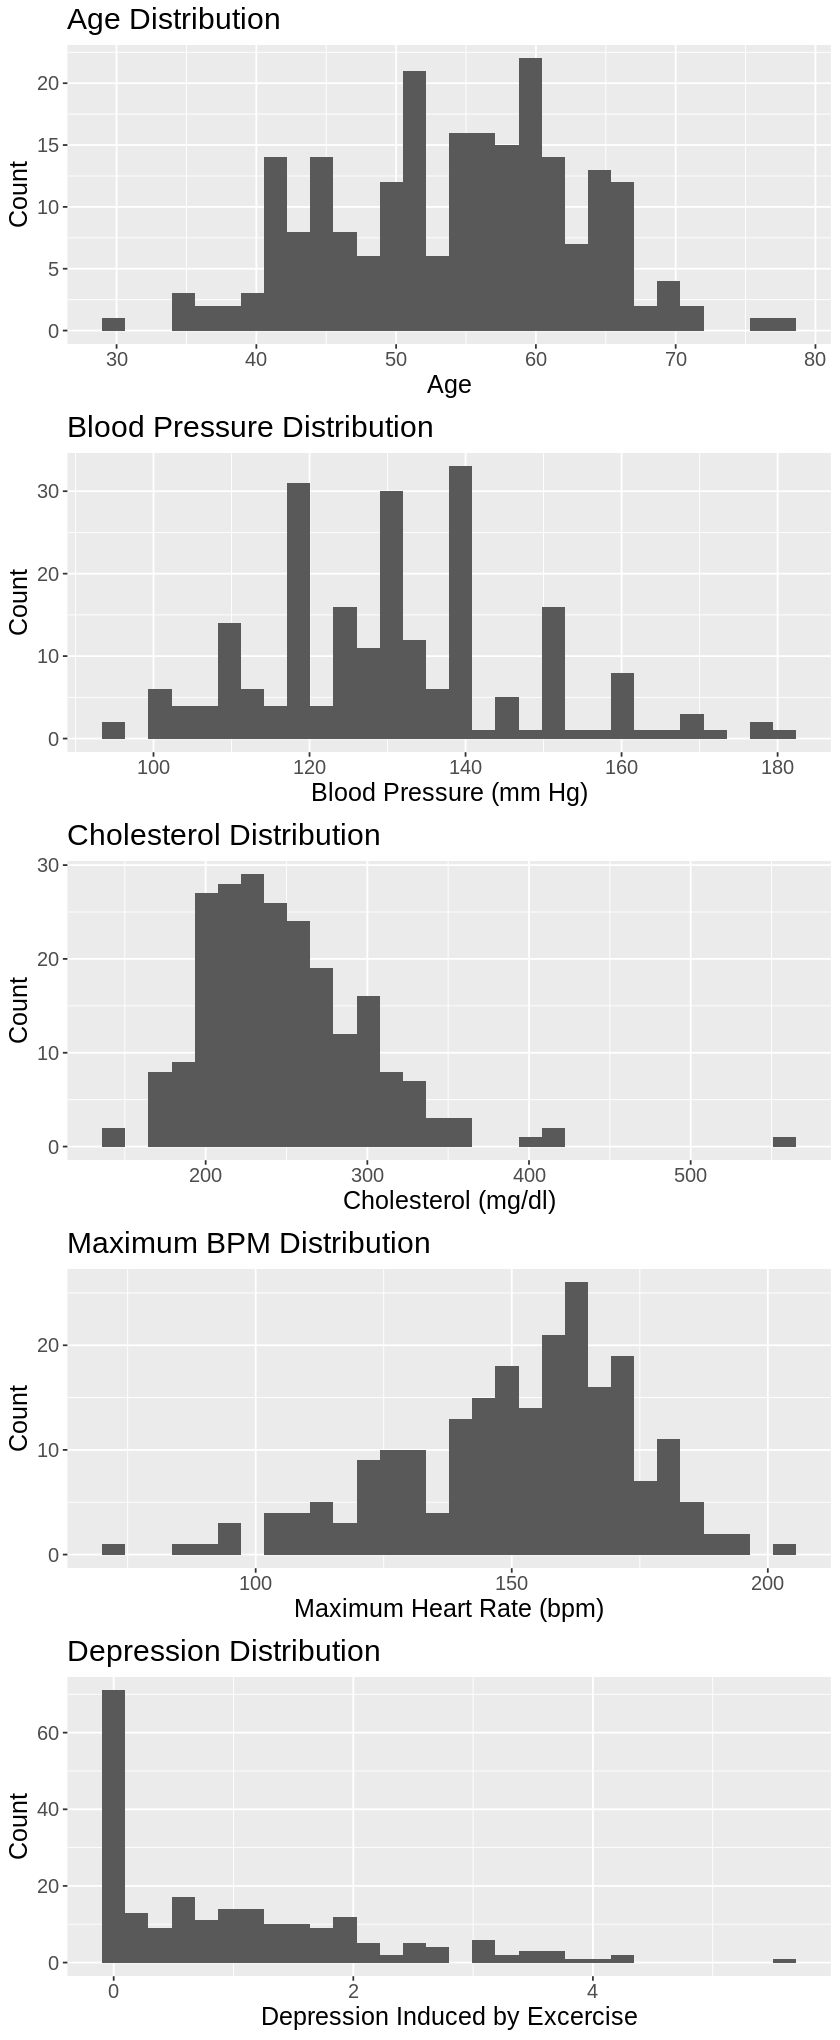

In [46]:
options(repr.plot.width = 7, repr.plot.height = 17)
age_visualization <- training_data |>
    ggplot(aes(x = age)) +
    geom_histogram(position = "identity") +
    labs(x = "Age", y = "Count") +
    ggtitle("Age Distribution") +
    theme(text = element_text(size = 15))
trestbps_visualization <- training_data |>
    ggplot(aes(x = trestbps)) +
    geom_histogram(position = "identity") +
    labs(x = "Blood Pressure (mm Hg)", y = "Count") +
    ggtitle("Blood Pressure Distribution") +
    theme(text = element_text(size = 15))
chol_visualization <- training_data |>
    ggplot(aes(x = chol)) +
    geom_histogram(position = "identity") +
    labs(x = "Cholesterol (mg/dl)", y = "Count") +
    ggtitle("Cholesterol Distribution") +
    theme(text = element_text(size = 15))
thalach_visualization <- training_data |>
    ggplot(aes(x = thalach)) +
    geom_histogram(position = "identity") +
    labs(x = "Maximum Heart Rate (bpm)", y = "Count") +
    ggtitle("Maximum BPM Distribution") +
    theme(text = element_text(size = 15))
oldpeak_visualization <- training_data |>
    ggplot(aes(x = oldpeak)) +
    geom_histogram(position = "identity") +
    labs(x = "Depression Induced by Exercise", y = "Count") +
    ggtitle("Depression Distribution") +
    theme(text = element_text(size = 15))
data_visualization <- plot_grid(age_visualization, trestbps_visualization, chol_visualization, thalach_visualization, oldpeak_visualization, ncol = 1)
data_visualization

### Methods

First, we will use our training dataset to train our classification model. Then we will predict the variable "num" using the predictor variables listed in the preceding tables (heart disease diagnosis). Cross-validation will be used to determine the accuracy for multiple "k" values.
Following that, we will plot the "k" values against their accuracy and select the best value.
subsequently, we can test our model with the testing set, where we will be using a 75% split for training and a 25% split for testing data, and then we can evaluate the accuracy of our model. We can create a graph that compares the predicted data from our model to the actual testing data.
We can conclude the significance of our model and its potential implications in the real world.


### Expected outcomes and significance

After our data analysis, we expect to find if all of the predictors that we used are influential in determining if a patient has heart disease. If our model is accurate, then we can predict if a patient has heart disease, and thus they can seek help promptly. However, even if our model is not accurate enough, this can still be used to speculate if there is a chance they have heart disease and be used to refer the patients for further examination such as X-rays, MRI scans, electrocardiogram etc. In the future, we can incorporate other types of variables, such as categorical ones included in our data set (eg. Chest pain type, Condition, Resting ECG results), which could make our model even more precise for predicting heart disease diagnosis. Also, as more relevant data is collected, we can add additional variables to our data set that can also be considered in our prediction model. Also, we might be able to find ways to use this model to predict other health problems.
